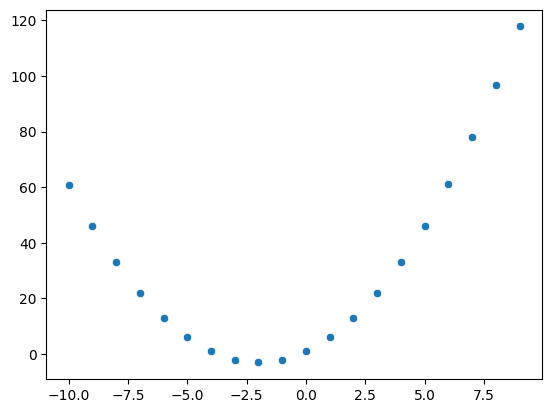

In [4]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

# y = 1 + 4x + x**2

X = np.arange(-10,10)
y = 1 + 4*X + X**2 + np.random.randn(20)*0.1

sns.scatterplot(x = X,y = y);

In [11]:
poly = PolynomialFeatures(degree=2)
poly_1 = poly.fit_transform(X.reshape(-1,1))
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
print(lr.coef_, lr.intercept_)

[3.0050194] 34.003337566540615


In [14]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df["PRICE"] = boston.target

# boston_df

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_data = boston_df.iloc[:,:-1]
y_target = boston_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS 학습/예측/평가
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}, RMSE: {rmse:.3f}")
print(f"Variance score: {r2:.3f}")

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [15]:
coef = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coef.loc["intercept"] = np.round(lr.intercept_, 1)
coef.sort_values(ascending = False)

intercept    41.0
RM            3.4
CHAS          3.0
RAD           0.4
ZN            0.1
INDUS         0.0
AGE           0.0
TAX          -0.0
B             0.0
CRIM         -0.1
LSTAT        -0.6
PTRATIO      -0.9
DIS          -1.7
NOX         -19.8
dtype: float64

In [31]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

# 인자로 회귀 모델의 이름, alpha값들의 리스트, 피처 데이터 세트와 타깃 데이터 세트를 받아서
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수 값들을 DataFrame으로 반환하는 사용자 함수
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True) :
    coeff_df = pd.DataFrame()
    
    # 모델이름 출력
    if verbose :
        print('####', model_name, '####')
    
    # 모델에 따라 설정
    for param in params : 
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        # 교차 검증
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        neg_mes_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mes_scores))
        print(f'alpah {param}일 때 5 fold set의 평균 RMSE : {avg_rmse:.3f}')
        
        # 회귀 계수
        model.fit(X_data_n, y_target_n)
        
        if return_coeff :
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname='alpha'+str(param)
            coeff_df[colname] = coeff    
    return coeff_df

In [32]:
X_data = boston_df.iloc[:,:-1]
y_target = boston_df.iloc[:,-1]

lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
lasso_coef = get_linear_reg_eval("Lasso", params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#### Lasso ####
alpah 0.07일 때 5 fold set의 평균 RMSE : 5.612
alpah 0.1일 때 5 fold set의 평균 RMSE : 5.615
alpah 0.5일 때 5 fold set의 평균 RMSE : 5.669
alpah 1일 때 5 fold set의 평균 RMSE : 5.776
alpah 3일 때 5 fold set의 평균 RMSE : 6.189


In [ ]:
알파값이 0일 때, 5 folds의 평균 RMSE : 5.829
알파값이 0.1일 때, 5 folds의 평균 RMSE : 5.788
알파값이 1일 때, 5 folds의 평균 RMSE : 5.653
알파값이 10일 때, 5 folds의 평균 RMSE : 5.518
알파값이 100일 때, 5 folds의 평균 RMSE : 5.330

In [42]:
lasso_coef

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


In [43]:
# l1_ratio는 0.7로 고정
elasitic_alphas = [0.07, 0.1, 0.5, 1, 3]
elasitic_coef = get_linear_reg_eval("ElasticNet", params=elasitic_alphas, X_data_n=X_data, y_target_n=y_target)

#### ElasticNet ####
alpah 0.07일 때 5 fold set의 평균 RMSE : 5.542
alpah 0.1일 때 5 fold set의 평균 RMSE : 5.526
alpah 0.5일 때 5 fold set의 평균 RMSE : 5.467
alpah 1일 때 5 fold set의 평균 RMSE : 5.597
alpah 3일 때 5 fold set의 평균 RMSE : 6.068


In [44]:
elasitic_coef

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.574162,3.414154,1.918419,0.938789,0.000000
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
DIS,-1.189438,-1.173647,-0.975902,-0.725174,-0.031208
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417


In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# 데이터 변환 함수
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [48]:
alphas = [0.1, 1, 10, 100]

# 피처 변환 리스트
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    
    get_linear_reg_eval("Ridge", params=alphas, X_data_n=X_data, y_target_n=y_target)


## 변환 유형:None, Polynomial Degree:None
#### Ridge ####


NameError: name 'Ridge' is not defined

# 로지스틱 회귀분석
로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘이다. 일반적인 선형회귀와는 조금 다르다. 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라, 시그모이드(Sigmoid)함수의 최적선을 찾고 이 시그모이드 함수의 반환값을 확률로 간주하며 그 확률에 따라 분류를 결정한다는 점이다.

단순 선형 회귀에서는 목표가 실수값 예측이다. 따라서 선형함수인 `wx + b`를 이용하여 예측할 수 있지만 로지스틱 회귀분석에서는 종속변수가 0또는 1이기 때문에 `y = wx+b`를 통해 예측하는 것은 의미가 없다. 그래서 Odds(오드, 오즈)값을 이용한다.

만약 독립변수가 하나라면 공식은 다음과 같다.
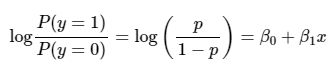

이 식을 정리하여 확률에 대해 나타내면 다음과 같다.
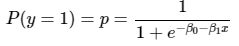

위 식에서 1/1+e(¯x)형태의 함수식을 시그모이드 함수라 한다.

사이킷런에서는 `LogisticRegression`클래스를 이용하여 로지스틱 회귀를 해볼 수 있다. 앞에서 사용하던 위스콘신 유방암 데이터 셋을 기반으로 실습을 진행해보자

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# 데이터 불러오기
cancer = load_breast_cancer()

선형회귀 계열인 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능이 영향을 받을 수 있으므로, 데이터에 먼저 정규 분포 형태의 표준 스케일링을 적용한 뒤 데이터 셋을 나누겠다.

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StaStandardScaler()로 평균이 0, 분산이 1이 나오도록 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

# train, test
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)
lr_proba = lr_clf.predict_proba(X_test)[:,1].reshape(-1,1)

accuracy = accuracy_score(y_test, lr_pred)
auc = roc_auc_score(y_test, lr_proba)

print(f"accuracy: {accuracy:.4f}")
print(f"auc: {auc:.4f}")

accuracy: 0.9766
auc: 0.9947


In [111]:
warnings.filterwarnings('default')

from sklearn.model_selection import GridSearchCV

params = {
    "solver" : ['liblinear', 'lbfgs'],
    "penalty": ["l2", "l1"], 
    "C": [0.01, 0.1, 1, 5, 10]
}

lr_clf = LogisticRegression()
grid_cv = GridSearchCV(lr_clf, param_grid = params, scoring="accuracy", cv=3)
grid_cv.fit(cancer.data, cancer.target)

print("최적 하이퍼 파라미터:", grid_cv.best_params_)
print("최적 평균 정확도:", round(grid_cv.best_score_, 4))

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

최적 하이퍼 파라미터: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
최적 평균 정확도: 0.9561


In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

# 보스턴 데이터
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

boston_df['PRICE'] = boston.target
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1,inplace=False)

# RandomForestRegressor
rf = RandomForestRegressor(random_state=0, n_estimators=1000)

neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'5 교차 검증의 개별 Negative MSE scores: {np.round(neg_mse_scores, 2)}')
print(f'5 교차 검증의 개별 RMSE scores: {np.round(rmse_scores, 2)}')
print(f'5 교차 검증의 평균 RMSE : {avg_rmse:.3f}')

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

5 교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


In [114]:
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# boston sample: 100, feature: RM
boston_df_sample = boston_df[['RM','PRICE']].sample(n=100, random_state=0)
X_feature = np.array(boston_df_sample.RM).reshape(-1,1)
y_target = np.array(boston_df_sample.PRICE).reshape(-1,1)

# test data: 4.5 ~ 8.5 , 100개의 데이터
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

# 모델 객체 생성
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 학습/예측
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

lr_pred = lr_reg.predict(X_test)
rf_reg2_pred = rf_reg2.predict(X_test)
rf_reg7_pred = rf_reg7.predict(X_test)

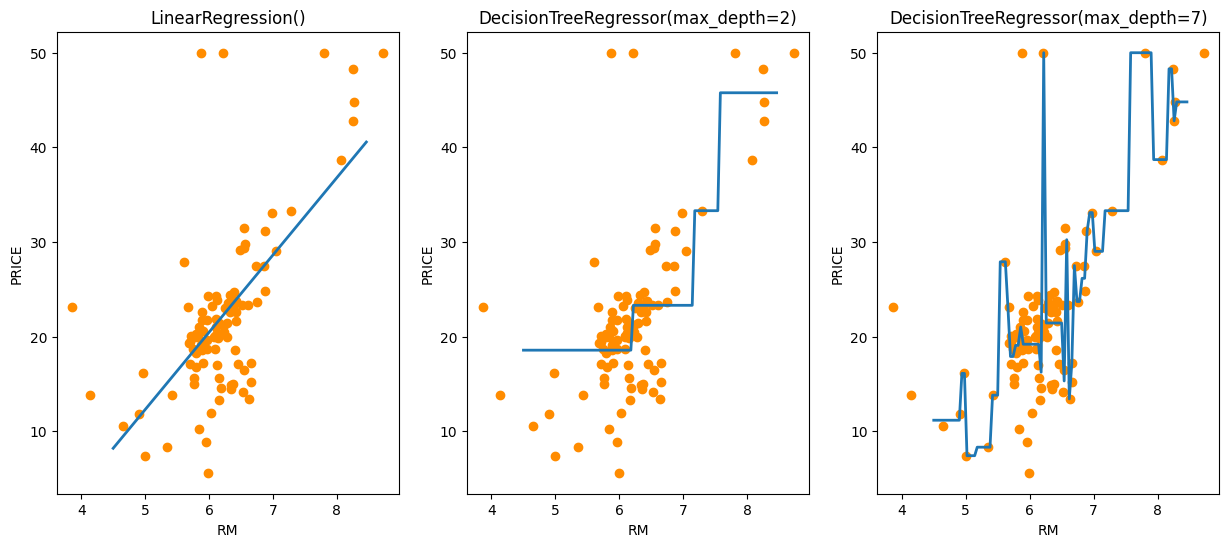

In [115]:
fig, axs = plt.subplots(1,3, figsize=(15,6))

models = [lr_reg, rf_reg2, rf_reg7]

for i, model in enumerate(models):
    pred = model.predict(X_test)
    
    axs[i].scatter(X_feature , y_target, c="darkorange")
    axs[i].plot(X_test, pred, lw=2)
    
    axs[i].set_title(model)
    axs[i].set_xlabel("RM")
    axs[i].set_ylabel("PRICE")
    
plt.show()

In [56]:
import numpy as np
import pandas as pd
bike_df = pd.read_csv("./bike_train.csv")
print(bike_df.shape)
bike_df[:3]

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [57]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [58]:
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])
# 다른 방법
# bike_df['datetime'] = bike_df['datetime'].astype(['datetime64'])

In [59]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [72]:
bike_df['year'] = bike_df['datetime'].dt.year
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['day'] = bike_df['datetime'].dt.day
bike_df['hour'] = bike_df['datetime'].dt.hour
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [74]:
# 또 다른 분리 방법
bike_df['datetime'].dt.strftime('%Y')
bike_df['datetime'].dt.strftime('%m')
bike_df['datetime'].dt.strftime('%d')
bike_df['datetime'].dt.strftime('%H')

0        00
1        01
2        02
3        03
4        04
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: object

In [75]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [81]:
# 'datetime' 'casual', 'registered' 칼럼 삭제
bike_df.drop(columns=['datetime', 'casual', 'registered'], inplace=True)

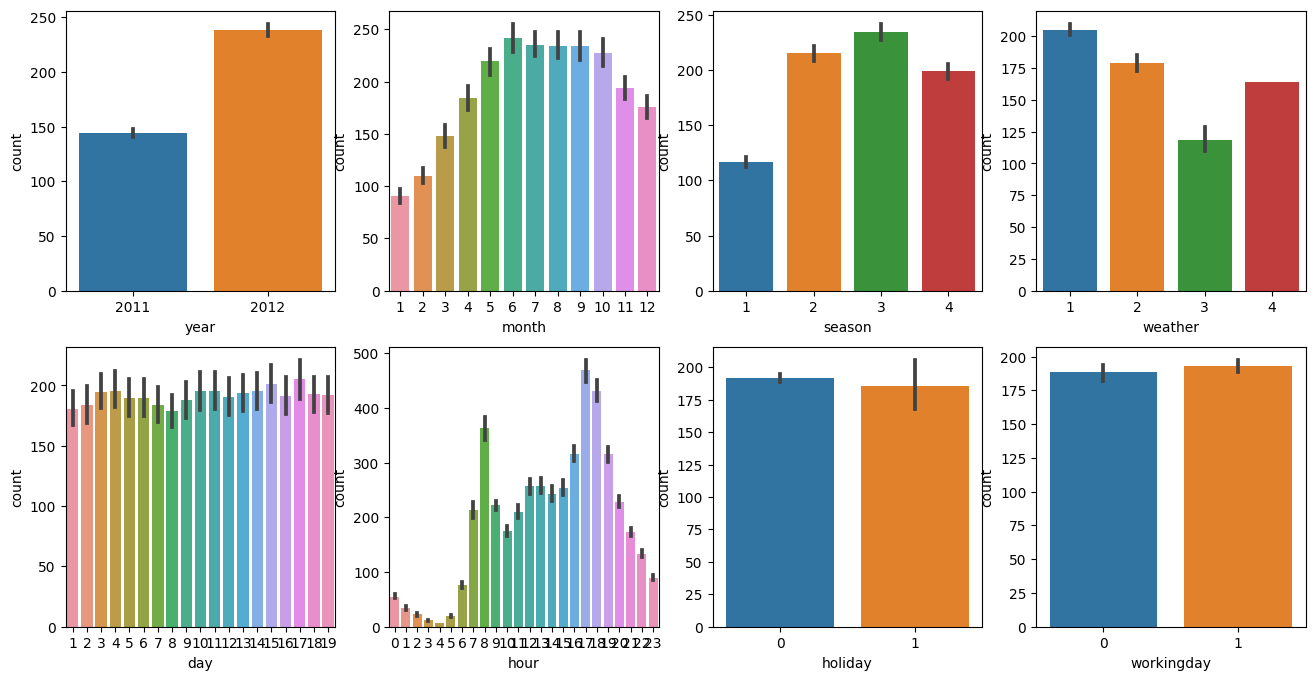

In [82]:
# 시각화
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 평균값을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col]) 

In [84]:
y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [92]:
from sklearn.linear_model import LogisticRegression

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# mse로 구했을 때
mse(y_test, pred)

19852.694087841555

In [182]:
def evaluate_regr(y,pred):
    # MAE
    mae = mean_absolute_error(y,pred)
    
    # RMSE
    rmse = np.sqrt(mean_squared_error(y,pred))
    
    # RMSLE
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    msle = np.mean((log_y - log_pred) ** 2)
    rmsle = np.sqrt(msle)    
    
    print(f'MAE: {mae:.3f}, RMSE: {rmse:.3f}, RMSLE: {rmsle:.3f}')

In [105]:
# test와 pred를 로그 변환하여 mse를 구하면
np.mean((np.log1p(y_test) - np.log1p(pred))**2)

1.3564413563964943

In [97]:
from sklearn.metrics import mean_absolute_error as mae

# log 변환시 NaN등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def evaluate_regr(y, pred) :
    rmsle_val = rmsle(y, pred)
    rmse_val = np.sqrt(mse(y, pred))
    
    # MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mae(y, pred)
    
    print(f'RMSLE : {rmsle_val:.3f}, RMSE : {rmse_val:.3f}, MAE : {mae_val:.3f}')

In [98]:
evaluate_regr(y_test, pred)

RMSLE : 1.165, RMSE : 140.900, MAE : 105.924


In [ ]:
# count값을 log1p로 로그 변환

In [162]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [167]:
iris = load_iris()
X_features = iris.data
y_labels = iris.target
iris_df = pd.DataFrame(X_features)
iris_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


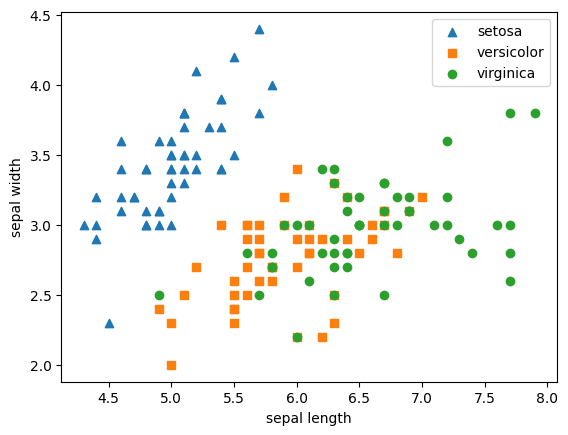

In [174]:
iris_df['target'] = iris.target
markers = ["^", "s", "o"]

for i, marker in enumerate(markers) :
    x_axis_data = iris_df[iris_df['target']==i][0]
    y_axis_data = iris_df[iris_df['target']==i][1]
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [118]:
# Target 값을 제외하고 모든 속성값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환하자
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(X_features)
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [119]:
from sklearn.decomposition import PCA
# 2차원 PCA데이터로 변환
pca = PCA(n_components=2)
pca.fit_transform(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca)

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

In [ ]:
print(iris_scaled.shape,'\n',iris_pca.shape)

(150, 4) 
 (150, 2)


In [120]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(random_state=156)
orignal_data = cross_val_score(rf_clf, iris_scaled, y_labels, scoring='accuracy', cv=3)
pca_data = cross_val_score(rf_clf, iris_pca, y_labels, scoring='accuracy', cv=3)

print(f'원본 데이터 교차검증 개별 정확도 : {orignal_data}\n원본 데이터 평균 정확도 : {np.mean(orignal_data)}')
print()
print(f'PCA 변환 데이터 교차검증 개별 정확도 : {pca_data}\n원본 데이터 평균 정확도 : {np.mean(pca_data)}')

원본 데이터 교차검증 개별 정확도 : [0.98 0.94 0.96]
원본 데이터 평균 정확도 : 0.96

PCA 변환 데이터 교차검증 개별 정확도 : [0.88 0.88 0.88]
원본 데이터 평균 정확도 : 0.88


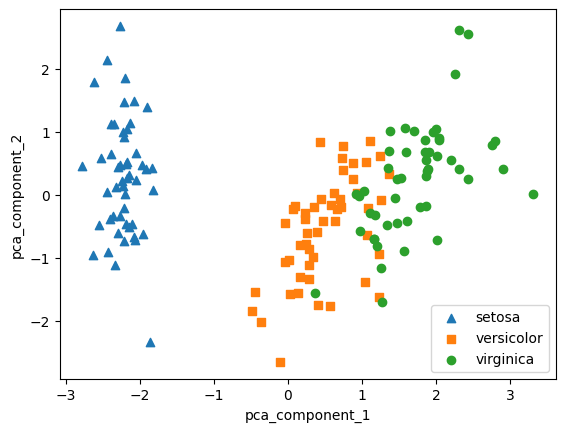

In [124]:
!pip install xlrd

     ---------------------------------------- 96.5/96.5 kB 2.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [126]:
# credit card clients
import pandas as pd

# 1번 인덱스를 header로 삼고, 데이터가 있는 덱셀 시트명은 'Data'이다
df = pd.read_excel('./default of credit card clients.xls', header=1, sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df[:3]

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [127]:
# 컬럼명 변경
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)

y_target = df['default']
X_features = df.drop('default', axis=1) 

In [128]:
# 상관관계 보기
corr = X_features.corr()
corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027


<AxesSubplot:>

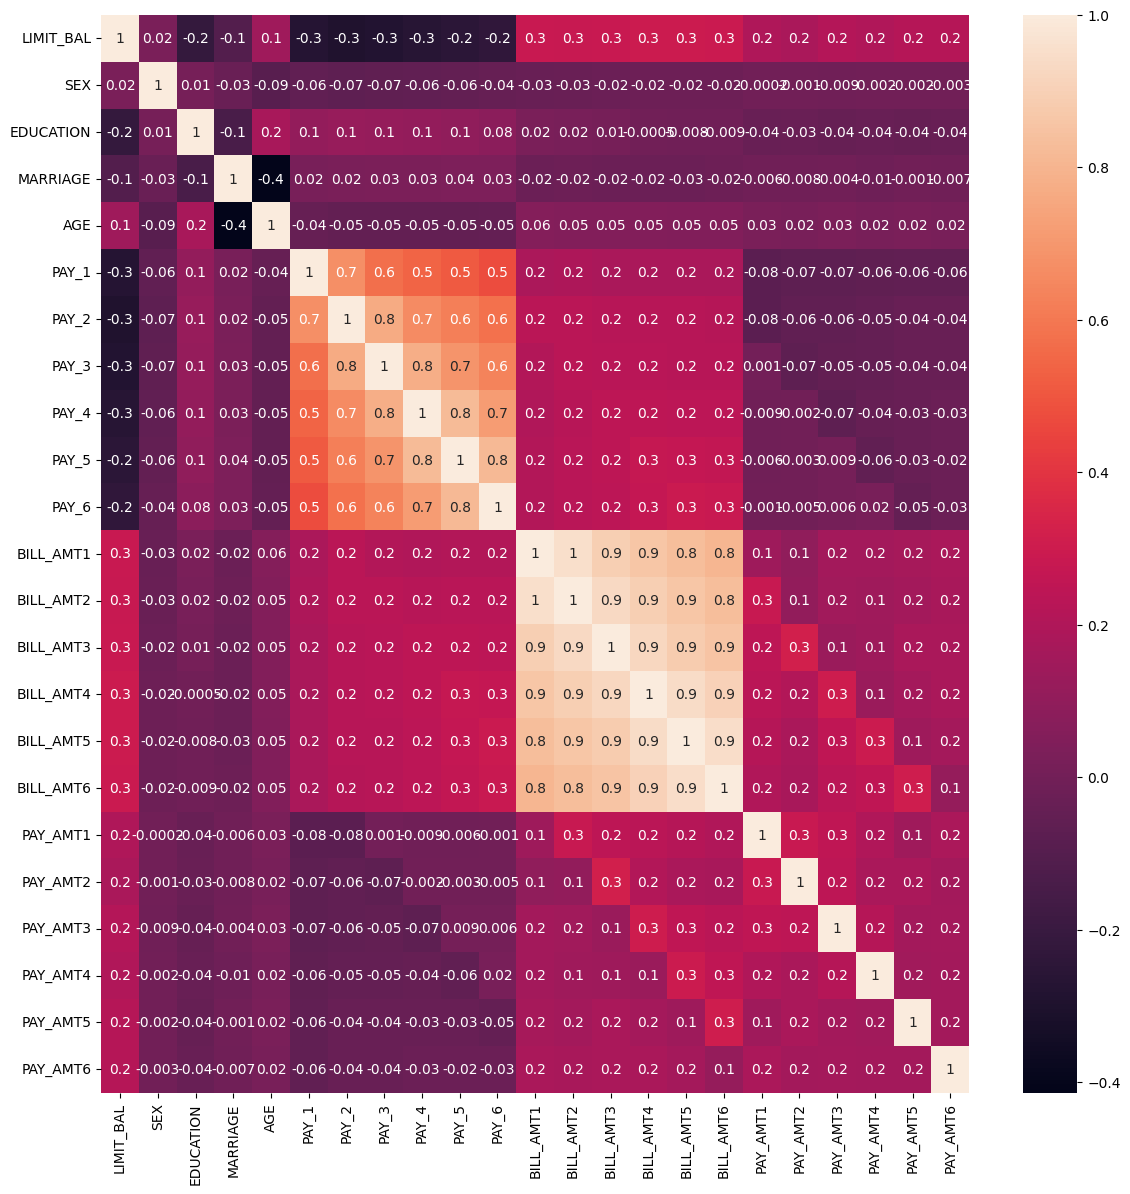

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [130]:
# BILL_AMT1~6만 솎아내기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [137]:
# 이름도 변경할 겸 데이터 안전을 위해 df를 카피하여주자
card_df = df.copy()
# BILL_AMT1  ~ 6까지의 6개 속성만 뽑아주기
card_df = card_df.iloc[:, 11:17]
card_df

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
29995,188948,192815,208365,88004,31237,15980
29996,1683,1828,3502,8979,5190,0
29997,3565,3356,2758,20878,20582,19357
29998,-1645,78379,76304,52774,11855,48944


In [151]:
# 1. scaling 변환
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
card_bill_scaler = scaler.fit_transform(X_features)
card_bill_scaler

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [158]:
# 2. pca 변환
from sklearn.decomposition import PCA
# 2차원 PCA데이터로 변환
pca = PCA(n_components=2)
card_bill_pca = pca.fit_transform(card_bill_scaler)
print(card_bill_pca)

[[-1.88796247 -0.9061075 ]
 [-0.76469577 -2.10928777]
 [-0.84740789 -1.0721793 ]
 ...
 [ 0.35745734 -3.31275505]
 [ 0.65055187  0.72290108]
 [-0.14556442 -0.80975087]]


In [160]:
# 3. pca 변환 이전에 대하여 logisticregression으로 분류 (cv=5)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_clf = LogisticRegression(random_state=156)
cross_val_score(lr_clf, card_bill_scaler, y_target, scoring='accuracy', cv=3)
# (cv=5) array([0.803     , 0.806     , 0.8125    , 0.81616667, 0.812     ])
# (cv=3) array([0.806 , 0.8138, 0.8086])

array([0.806 , 0.8138, 0.8086])

In [181]:
print(card_bill_scaler.shape,'\n',card_bill_pca.shape)

(30000, 23) 
 (30000, 2)
